# Table of content

1. Detailed analysis of average order value

2. Analysis of the dependencies with providers per product category

In [422]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [423]:
path='/Users/vera-al/Downloads/dataset2.csv'
df = pd.read_csv(path)

In [424]:
df.head()

,Order Id,Product categorie,Product subcategorie,Product reference,Product quantity,Totalprice(unitpricexproductquantity),Supplier country,Supplier ID
0,61865,Spirits,Anise,483222,2,14.90,Spain,1
1,62447,Wine,Rosé,822222,12,64.20,Spain,1
2,64401,Spirits,Herbal liquor,434732,1,13.15,Spain,2
3,64588,Wine,red,600772,30,172.50,Spain,3
4,64674,Spirits,Tequila,857357,1,36.70,Spain,1


In [425]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392105 entries, 0 to 392104
Data columns (total 8 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Order Id                               392105 non-null  int64  
 1   Product categorie                      392105 non-null  object 
 2   Product subcategorie                   391264 non-null  object 
 3   Product reference                      392105 non-null  int64  
 4   Product quantity                       392105 non-null  int64  
 5   Totalprice(unitpricexproductquantity)  392105 non-null  float64
 6   Supplier country                       392105 non-null  object 
 7   Supplier ID                            392105 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 23.9+ MB
None


In [426]:
# Add unit price column
df['Unit price'] = df['Totalprice(unitpricexproductquantity)'] / df['Product quantity']

In [427]:
df.describe()

,Order Id,Product reference,Product quantity,Totalprice(unitpricexproductquantity),Supplier ID,Unit price
count,392105.000000,3.921050e+05,392105.000000,392105.000000,392105.000000,392105.000000
mean,206362.621048,7.745483e+05,5.406034,73.664508,71.792961,21.184665
std,79428.420626,3.062226e+05,8.781861,347.275045,62.018536,48.957907
min,61865.000000,4.300000e+01,1.000000,0.010000,1.000000,0.010000
25%,138464.000000,4.457420e+05,1.000000,19.580000,6.000000,7.850000
50%,206161.000000,8.075040e+05,3.000000,40.740000,86.000000,12.600000
75%,274664.000000,1.064266e+06,6.000000,85.500000,124.000000,23.090000
max,345868.000000,1.336152e+06,1440.000000,144121.300000,265.000000,14412.130000


In [428]:
# Calculate unique values
# df['Order Id'].nunique()
# df['Product reference'].nunique()
df['Supplier country'].nunique()

11

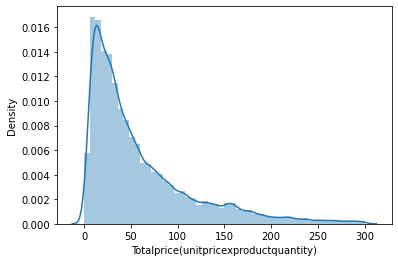

In [416]:
sns.distplot(
    df[df['Totalprice(unitpricexproductquantity)'] <=300]['Totalprice(unitpricexproductquantity)']);


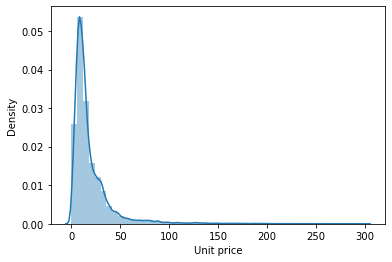

In [417]:
sns.distplot(
    df[df['Unit price'] <=300]['Unit price']);

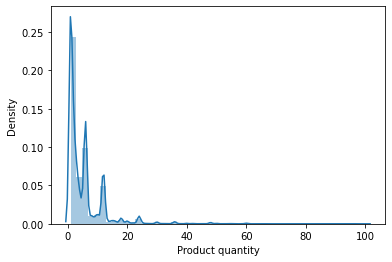

In [418]:
sns.distplot(
    df[df['Product quantity'] <=100]['Product quantity']);

Let's look at the large orders more closely

In [245]:
df.sort_values(by='Totalprice(unitpricexproductquantity)', ascending=False).head()

,Order Id,Product categorie,Product subcategorie,Product reference,Product quantity,Totalprice(unitpricexproductquantity),Supplier country,Supplier ID,Unit price
313414,288063,Spirits,Rum,556460,10,144121.30,Spain,86,14412.130000
310038,285611,Wine,white,1266546,60,144100.00,France,143,2401.666667
314942,289155,Spirits,Cognac,890221,2,9350.44,Spain,86,4675.220000
36885,94846,Spirits,Whiskey,559215,15,9001.50,Spain,6,600.100000
149872,173700,Spirits,Whiskey,559215,6,6390.00,Spain,92,1065.000000


In [246]:
df.sort_values(by='Product quantity', ascending=False).head()

,Order Id,Product categorie,Product subcategorie,Product reference,Product quantity,Totalprice(unitpricexproductquantity),Supplier country,Supplier ID,Unit price
202075,210569,Wine,sparkling,609145,1440,4737.6,Spain,6,3.29
182675,196601,Wine,sparkling,609145,960,3158.4,Spain,6,3.29
153804,176412,Wine,sparkling,609145,480,1579.2,Spain,6,3.29
63942,115292,Wine,sparkling,609145,480,1579.2,Spain,6,3.29
132928,161688,Wine,sparkling,609145,480,1579.2,Spain,6,3.29


In [247]:
df.sort_values(by='Unit price', ascending=False).head()

,Order Id,Product categorie,Product subcategorie,Product reference,Product quantity,Totalprice(unitpricexproductquantity),Supplier country,Supplier ID,Unit price
313414,288063,Spirits,Rum,556460,10,144121.30,Spain,86,14412.13
373647,331175,Wine,red,227394,1,4900.00,Netherlands,137,4900.00
314942,289155,Spirits,Cognac,890221,2,9350.44,Spain,86,4675.22
96811,137600,Wine,red,227394,1,3899.00,Netherlands,137,3899.00
391246,345045,Wine,red,379215,1,3893.96,France,33,3893.96


In [429]:
df.pivot_table(['Product quantity', 'Unit price', 'Totalprice(unitpricexproductquantity)'], ['Product categorie'], aggfunc='mean').head(10)

,Product quantity,Totalprice(unitpricexproductquantity),Unit price
Product categorie,,,
Accessories,2.480900,61.065423,45.516405
Beer,9.305365,22.207265,4.889080
Christmas gifts,1.616162,76.423838,54.938586
Gourmet,6.290148,23.641033,8.545009
Lots and gifts,1.744928,69.664890,47.184051
Spirits,4.216755,79.115228,26.292083
Wine,6.393505,73.874839,17.078926


In [430]:
s = sum(df['Totalprice(unitpricexproductquantity)'])
df.pivot_table(['Totalprice(unitpricexproductquantity)'], ['Product categorie'], aggfunc='sum').applymap(lambda x: "{0:.0f}%".format(100*x/s))

,Totalprice(unitpricexproductquantity)
Product categorie,
Accessories,0%
Beer,1%
Christmas gifts,0%
Gourmet,1%
Lots and gifts,1%
Spirits,50%
Wine,48%


In [431]:
dff = df[(df['Product categorie'] == 'Spirits') + (df['Product categorie'] == 'Wine')]

ss=dff.pivot_table(['Totalprice(unitpricexproductquantity)'], ['Product categorie', 'Product subcategorie'], aggfunc='sum')

ss=ss.sort_values('Totalprice(unitpricexproductquantity)', ascending=False)

total = sum(df['Totalprice(unitpricexproductquantity)'])

ss.applymap(lambda x: "{0:.0f}%".format(100*x/total)).head(10)

Totalprice(unitpricexproductquantity)
Product categorie Product subcategorie                                      
Wine              red                                                    28%
Spirits           Whiskey                                                16%
Wine              white                                                   9%
Spirits           Vodka                                                   8%
Wine              sparkling                                               7%
Spirits           Rum                                                     7%
                  Gin                                                     5%
                  Brandy                                                  3%
                  Pastis                                                  2%
Wine              Rosé                                                    2%

## Observation

Top-5 Spirits - Whiskey, Vodka, rum, Gin, Brandy

Top-3 Wines - red, sparrkling, white

Will give us ~85% of the wine&spirits sales

In [432]:
ss=df.pivot_table(['Totalprice(unitpricexproductquantity)'], ['Product categorie', 'Product subcategorie','Product reference'], aggfunc='sum')

ss=ss.sort_values('Totalprice(unitpricexproductquantity)', ascending=False)

total = sum(df['Totalprice(unitpricexproductquantity)'])

ss.applymap(lambda x: "{0:.0f}%".format(100*x/total)).head(10)

Totalprice(unitpricexproductquantity)
Product categorie Product subcategorie Product reference                                      
Spirits           Vodka                435793                                               2%
                  Whiskey              879256                                               2%
                                       435488                                               2%
                  Vodka                436890                                               1%
                  Brandy               449875                                               1%
                  Rum                  556460                                               1%
                                       653749                                               1%
Wine              white                1266546                                              0%
Spirits           Cognac               435322                                               0%
                  Pastis               436719                                               0%

In [434]:
# Manually check is we have alternative suppliers

df[df['Product reference'] == 653749].pivot_table(['Product quantity'], ['Supplier ID'], aggfunc='sum').sort_values('Product quantity', ascending=False)

# 435793
# 879256
# 435488
# 436890
# 449875
# 556460
# 653749

,Product quantity
Supplier ID,
92,4041
86,2546
124,1633
15,1526
2,330
18,255
13,173
1,170
244,129


In [435]:
ss=df.pivot_table(['Totalprice(unitpricexproductquantity)'], ['Supplier ID'], 
                  columns=['Product categorie'], aggfunc='sum', fill_value=0, margins=True)
# ss
ss.sort_values(by=('Totalprice(unitpricexproductquantity)', 'All'), ascending=False,inplace=True)
ss = ss.drop(index='All', axis=0)

total = sum(df['Totalprice(unitpricexproductquantity)'])

ss.applymap(lambda x: "{0:.0f}%".format(100*x/total)).head(15)

Totalprice(unitpricexproductquantity)                       \
Product categorie                           Accessories Beer Christmas gifts   
Supplier ID                                                                    
92                                                   0%   0%              0%   
6                                                    0%   0%              0%   
124                                                  0%   0%              0%   
86                                                   0%   0%              0%   
165                                                  0%   0%              0%   
1                                                    0%   0%              0%   
13                                                   0%   0%              0%   
180                                                  0%   0%              0%   
2                                                    0%   0%              0%   
3                                                    0%   0%              0%   
15                                                   0%   0%              0%   
19                                                   0%   0%              0%   
126                                                  0%   0%              0%   
5                                                    0%   0%              0%   
145                                                  0%   0%              0%   

                                                            
Product categorie Gourmet Lots and gifts Spirits Wine  All  
Supplier ID                                                 
92                     0%             0%     14%   1%  15%  
6                      0%             0%     11%   3%  15%  
124                    0%             0%      5%   4%   9%  
86                     0%             0%      4%   3%   7%  
165                    0%             0%      0%   4%   4%  
1                      0%             0%      1%   3%   4%  
13                     0%             0%      2%   1%   4%  
180                    0%             0%      3%   0%   3%  
2                      0%             0%      1%   2%   2%  
3                      0%             0%      0%   2%   2%  
15                     0%             0%      0%   1%   2%  
19                     0%             0%      1%   0%   2%  
126                    0%             0%      1%   1%   2%  
5                      0%             0%      0%   1%   1%  
145                    0%             0%      0%   1%   1%

In [436]:
pd.crosstab(df['Supplier country'], df['Product categorie'], values=df['Totalprice(unitpricexproductquantity)'], 
            aggfunc=np.sum, normalize='columns').applymap(lambda x: "{0:.0f}%".format(100*x))

Product categorie,Accessories,Beer,Christmas gifts,Gourmet,Lots and gifts,Spirits,Wine
Supplier country,,,,,,,
Belgium,0%,0%,0%,0%,0%,0%,0%
France,1%,32%,0%,0%,7%,1%,11%
Germany,19%,0%,0%,1%,1%,2%,15%
Greece,0%,0%,0%,0%,0%,0%,0%
Italy,0%,3%,0%,2%,3%,1%,7%
Luxembourg,0%,0%,0%,0%,0%,0%,0%
Netherlands,1%,21%,1%,2%,1%,2%,3%
Portugal,0%,0%,0%,2%,0%,3%,5%
Serbia,0%,0%,0%,0%,0%,0%,0%


,Product quantity,Totalprice(unitpricexproductquantity),Unit price
Product quantity,1.000000,0.177725,-0.095038
Totalprice(unitpricexproductquantity),0.177725,1.000000,0.498317
Unit price,-0.095038,0.498317,1.000000


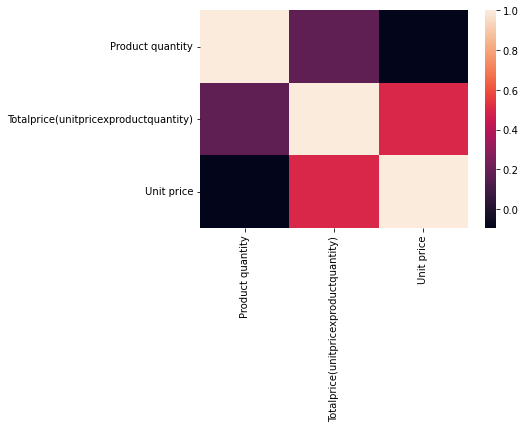

In [437]:
corr_matrix = df.drop(['Order Id', 'Product categorie', 'Product reference',
                      'Product subcategorie', 'Supplier ID'], axis=1).corr()

sns.heatmap(corr_matrix);

corr_matrix

Total price is more correlated with unit price than with quantity.

In [438]:
orders_total=pd.merge(df.pivot_table(['Product quantity'], columns=['Product categorie'],
               index=['Order Id'], aggfunc=sum, fill_value=0), 
         df.pivot_table(['Totalprice(unitpricexproductquantity)'],
               index=['Order Id'], aggfunc='sum', fill_value=0), 
         on='Order Id')
orders_total.columns = ['Accessories', 'Beer', 'Christmas gifts', 'Gourmet', 'Lots and gifts', 'Spirits', 'Wine', 'Totalprice']
orders_total[orders_total['Wine'] > 0][orders_total['Accessories'] > 0][orders_total['Lots and gifts'] > 0][orders_total['Spirits'] == 0][orders_total['Gourmet'] == 0]
# orders_total

,Accessories,Beer,Christmas gifts,Gourmet,Lots and gifts,Spirits,Wine,Totalprice
Order Id,,,,,,,,
184029,1,0,0,0,1,0,6,153.87
256167,2,0,0,0,3,0,98,2438.36
342011,12,0,0,0,2,0,71,2297.56


In [439]:
corrM = orders_total.corr()
 
corrM

,Accessories,Beer,Christmas gifts,Gourmet,Lots and gifts,Spirits,Wine,Totalprice
Accessories,1.000000,-0.001192,-0.000123,0.000683,0.000641,-0.011351,-0.011615,0.005354
Beer,-0.001192,1.000000,-0.001427,-0.000851,-0.004318,-0.034472,-0.036935,-0.003923
Christmas gifts,-0.000123,-0.001427,1.000000,-0.000510,0.014704,-0.005941,-0.002581,0.001087
Gourmet,0.000683,-0.000851,-0.000510,1.000000,0.010379,-0.012595,-0.030348,0.004486
Lots and gifts,0.000641,-0.004318,0.014704,0.010379,1.000000,-0.023992,-0.016586,0.010389
Spirits,-0.011351,-0.034472,-0.005941,-0.012595,-0.023992,1.000000,-0.199261,0.200553
Wine,-0.011615,-0.036935,-0.002581,-0.030348,-0.016586,-0.199261,1.000000,0.107393
Totalprice,0.005354,-0.003923,0.001087,0.004486,0.010389,0.200553,0.107393,1.000000


In [440]:
orders=pd.merge(df.pivot_table(['Product quantity'], columns=['Product categorie'],
               index=['Order Id'], aggfunc=lambda x: 1, fill_value=0), 
         df.pivot_table(['Totalprice(unitpricexproductquantity)'],
               index=['Order Id'], aggfunc='sum', fill_value=0), 
         on='Order Id')
orders

,"(Product quantity, Accessories)","(Product quantity, Beer)","(Product quantity, Christmas gifts)","(Product quantity, Gourmet)","(Product quantity, Lots and gifts)","(Product quantity, Spirits)","(Product quantity, Wine)",Totalprice(unitpricexproductquantity)
Order Id,,,,,,,,
61865,0,0,0,0,0,1,0,14.90
62447,0,0,0,0,0,0,1,64.20
64401,0,0,0,0,0,1,0,13.15
64588,0,0,0,0,0,0,1,172.50
64674,0,0,0,0,0,1,0,36.70
...,...,...,...,...,...,...,...,...
345864,0,0,0,0,0,1,0,248.00
345865,0,0,0,0,0,1,0,149.04
345866,0,0,0,0,0,1,0,400.38


In [441]:
orders.columns = ['Accessories', 'Beer', 'Christmas gifts', 'Gourmet', 'Lots and gifts', 'Spirits', 'Wine', 'Totalprice']

In [442]:
orders.pivot_table(['Totalprice'],['Accessories'],aggfunc='mean')

,Totalprice
Accessories,
0,132.614879
1,111.304046


In [443]:
orders.pivot_table(['Totalprice'],['Beer'],aggfunc='mean')

,Totalprice
Beer,
0,134.023190
1,65.503256


In [444]:
orders.pivot_table(['Totalprice'],['Christmas gifts'],aggfunc='mean')

,Totalprice
Christmas gifts,
0,132.506120
1,127.065938


In [445]:
orders.pivot_table(['Totalprice'],['Gourmet'],aggfunc='mean')

,Totalprice
Gourmet,
0,133.32261
1,97.02587


In [446]:
orders.pivot_table(['Totalprice'],['Lots and gifts'],aggfunc='mean')

,Totalprice
Lots and gifts,
0,132.647027
1,122.596084


In [447]:
orders.pivot_table(['Totalprice'],['Spirits'],aggfunc='mean')

,Totalprice
Spirits,
0,119.442412
1,147.090321


In [448]:
orders.pivot_table(['Totalprice'],['Wine'],aggfunc='mean')

,Totalprice
Wine,
0,135.087337
1,130.050296


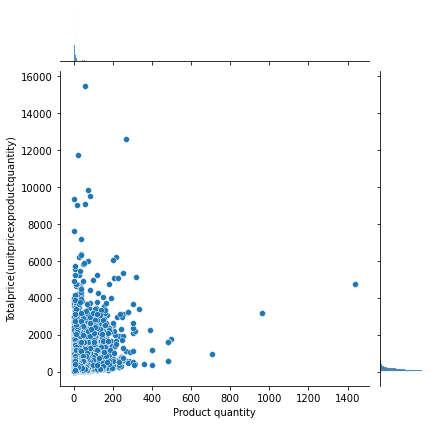

In [449]:
orders_cut=df.pivot_table(['Product quantity', 'Totalprice(unitpricexproductquantity)'],
               index=['Order Id'], aggfunc=sum, fill_value=0) 
# orders_cut     
sns.jointplot(x=orders_cut['Product quantity'], 
              y=orders_cut[orders_cut['Totalprice(unitpricexproductquantity)']<=20000]['Totalprice(unitpricexproductquantity)'], 
              data=orders_cut, 
              kind="scatter");

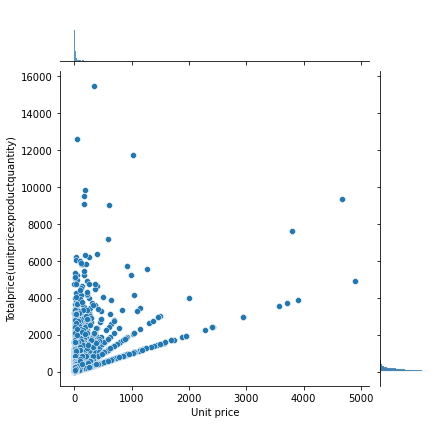

In [450]:
orders_cut2=pd.merge(df.pivot_table(['Unit price'],
               index=['Order Id'], aggfunc='mean', fill_value=0),
                     df.pivot_table(['Totalprice(unitpricexproductquantity)'],
               index=['Order Id'], aggfunc='sum', fill_value=0),
                     on = ['Order Id'])
                     
orders_cut2   
sns.jointplot(x=orders_cut2[orders_cut2['Unit price']<=6000]['Unit price'], 
              y=orders_cut2[orders_cut2['Totalprice(unitpricexproductquantity)']<=20000]['Totalprice(unitpricexproductquantity)'], 
              data=orders_cut2, 
              kind="scatter");

In [451]:
# df = df_pivot.reindex(df_pivot['Totalprice(unitpricexproductquantity)'].sort_values(by=df_pivot['Totalprice(unitpricexproductquantity)'], ascending=False).index)
zz=df_pivot.sort_values('Totalprice(unitpricexproductquantity)', ascending=False)
total = sum(df['Totalprice(unitpricexproductquantity)'])


zz=df_pivot.sort_values('Totalprice(unitpricexproductquantity)', 
                        ascending=False).applymap(lambda x: "{0:.0f}%".format(100*x/total)).head(5)

zz

,Totalprice(unitpricexproductquantity)
Supplier ID,
92,15%
6,15%
124,9%
86,7%
165,4%


## Observation

5 suppliers get ~50% of total sales. It's risky.
92, 6, 124, 86, 165

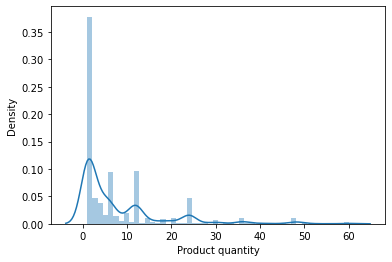

In [452]:
orders_total
sns.distplot(
    df[(df['Product quantity'] <=60) & (df['Product categorie'] =='Beer')]['Product quantity']);

<AxesSubplot:xlabel='Unit price', ylabel='Density'>

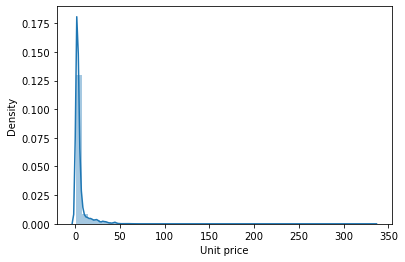

In [453]:
sns.distplot(
    df[df['Product categorie'] =='Beer']['Unit price'])